In [1]:
from hackathon.train import get_training_config
from hackathon.lr_find import COCOLRFinder

In [2]:
model = "retinanet-r101"
data_dir = "../data"
configs_dir = "../lib/detectron2/configs"
device = "cuda"
num_gpus = 1 #doesn't seem to work with 8?

In [3]:
cfg = get_training_config(model=model, 
                          data_dir=data_dir, 
                          configs_dir=configs_dir, 
                          device=device, 
                          num_gpus=num_gpus)

Loading config ../lib/detectron2/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


Num images 3451
[12/05 18:16:56 detectron2]: Rank of current process: 0. World size: 1
[12/05 18:16:57 detectron2]: Environment info:
----------------------  -------------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.9 (default, Aug 31 2020, 12:42:55) [GCC 7.3.0]
numpy                   1.19.4
detectron2              0.2.1 @/home/ubuntu/anaconda3/envs/noaa/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.1
detectron2 arch flags   sm_35, sm_37, sm_50, sm_52, sm_60, sm_61, sm_70, sm_75
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.6.0+cu101 @/home/ubuntu/anaconda3/envs/noaa/lib/python3.7/site-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0,1,2,3,4,5,6,7     Tesla V100-SXM2-16GB
CUDA_HOME               /usr/local/cuda
Pillow                  8.0.1
torchvision             0.7.0+cu101 @/home/ubuntu/anaconda3/

In [4]:
lr_finder = COCOLRFinder(cfg)

[12/05 18:17:02 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

/home/ubuntu/anaconda3/envs/noaa/lib/python3.7/site-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.20E-03


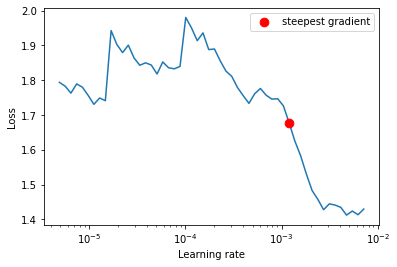

In [5]:
lr_finder.range_test()

In [6]:
1.20E-03*8

0.0096

In [7]:
3E-4*8

0.0024